In [1]:
import pandas as pd
import csv

In [2]:
data_train = pd.read_csv("train.csv",header=None)
data_test = pd.read_csv("test.csv",header=None)

In [10]:
data_test

,0,1,2
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [11]:
data_full = data_train.append(data_test)

In [12]:
data_full = data_full.reset_index().drop('index', axis=1)

In [13]:
X = data_full[2]
y = data_full[0]
z = data_full[1]

In [14]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

In [15]:
#n_splits=5 results in a 80-20-train-test-splitting
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=265224)

In [16]:
train_index_vec = []
test_index_vec = []
for train_index, test_index in rkf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_index_vec.append(train_index)
    test_index_vec.append(test_index)

TRAIN: [     0      1      3 ... 127596 127597 127598] TEST: [     2      9     21 ... 127591 127594 127599]
TRAIN: [     0      1      2 ... 127597 127598 127599] TEST: [     4      5      6 ... 127580 127589 127596]
TRAIN: [     1      2      3 ... 127597 127598 127599] TEST: [     0     10     18 ... 127586 127590 127592]
TRAIN: [     0      1      2 ... 127596 127597 127599] TEST: [     3     13     16 ... 127588 127593 127598]
TRAIN: [     0      2      3 ... 127596 127598 127599] TEST: [     1     12     15 ... 127585 127595 127597]
TRAIN: [     0      1      3 ... 127597 127598 127599] TEST: [     2      9     18 ... 127584 127586 127595]
TRAIN: [     1      2      4 ... 127596 127597 127599] TEST: [     0      3      5 ... 127583 127592 127598]
TRAIN: [     0      2      3 ... 127597 127598 127599] TEST: [     1     11     14 ... 127567 127591 127596]
TRAIN: [     0      1      2 ... 127595 127596 127598] TEST: [     4      8     13 ... 127594 127597 127599]
TRAIN: [     0     

In [17]:
len(train_index)/(len(train_index)+len(test_index))

0.8

In [18]:
len(test_index)/(len(train_index)+len(test_index))

0.2

In [19]:
#X = X.astype('string')
#z = z.astype('string')

#############################################################
for pos in range(len(train_index_vec)):
    df_train = pd.DataFrame()
    df_train[0] = y[train_index_vec[pos]]
    df_train[1] = z[train_index_vec[pos]].astype('string')
    df_train[2] = X[train_index_vec[pos]].astype('string')
    
    df_test = pd.DataFrame()
    df_test[0] = y[test_index_vec[pos]]
    df_test[1] = z[test_index_vec[pos]].astype('string')
    df_test[2] = X[test_index_vec[pos]].astype('string')
    
    
    filename = "train_"+str(pos)+'.csv'
    df_train.to_csv(filename, sep=',', header=False, index=False)
    filename = "test_"+str(pos)+'.csv'
    df_test.to_csv(filename, sep=',', header=False, index=False)

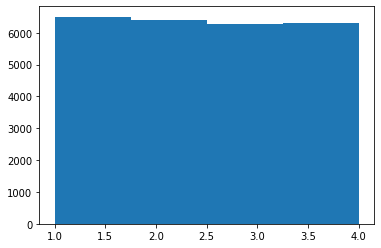

In [20]:
import matplotlib.pyplot as plt
plt.hist(np.array(df_test[0]),len(np.unique(np.array(df_train[0]))));

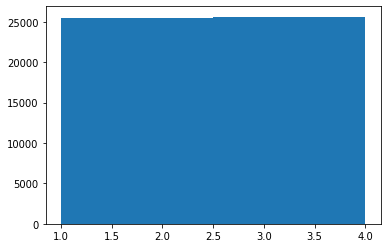

In [21]:
plt.hist(np.array(df_train[0]),len(np.unique(np.array(df_train[0]))));

In [22]:
len(np.unique(np.array(df_train[0])))

4

In [23]:
data_test2 = pd.read_csv("test_1.csv",header=None)

In [24]:
data_test2

,0,1,2
0,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
1,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
2,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...
3,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...
4,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...
...,...,...,...
25515,1,AU Issues Deadline to Khartoum and Darfur Rebels,ABUJA (Reuters) - The African Union issued a ...
25516,3,Airbus chief wins fight to take controls at Eads,The head of plane maker Airbus yesterday won a...
25517,2,England labour but find their second wind,This was not an easy day on which to play cric...
25518,2,The Newest Hope ; Marriage of Necessity Just M...,"NEW YORK - The TV lights were on, the cameras ..."


In [25]:
data_test

,0,1,2
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...
